In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# Number 1

In [60]:
train_df = pd.read_csv('train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### statement "GrLivArea and SalePrice has a strong correlation of 0.71

In [61]:
GrLivArea_df = train_df['GrLivArea']
SalePrice_df = train_df['SalePrice']
jointDF = pd.concat([GrLivArea_df, SalePrice_df], axis=1).reindex(GrLivArea_df.index)
jointDF.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


## Part A

### Fit a Linear Regression model, print the coefficients and plot the regression line

Response Variable : **SalePrice**     
Predictor Feature : **GrLivArea**       

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

Intercept of Regression 	: b =  [15390.68881432]
Coefficients of Regression 	: a =  [[108.51938136]]



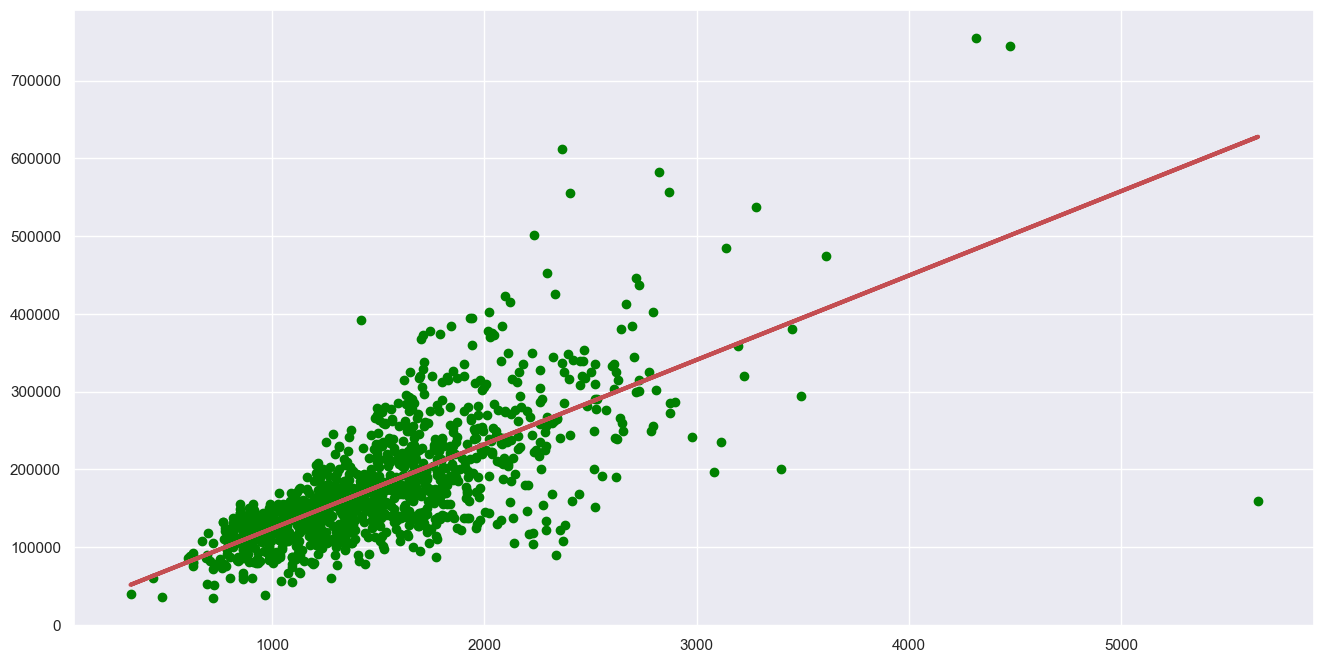

In [45]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the GrLivArea - SalePrice Dataset
GrLivArea = pd.DataFrame(train_df['GrLivArea'])    # Predictor
SalePrice = pd.DataFrame(train_df['SalePrice'])    # Response

# Split the Dataset into Train and Test
X_train,X_test,Y_train,Y_test = train_test_split(GrLivArea, SalePrice, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict SalePrice values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,y_train_pred,'r-',linewidth=3)
plt.show()

The model coefficients are `a = 108.51938136` and  `b = 15390.68881432`for this current fit model in the Regression Model : SalePrice =  𝑎
   ×
  GrLivArea +  𝑏

## Part B

### Goodness of Fit of Model & Prediction Accuracy

In [46]:
# Goodness of Fit of Model - Train Data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, y_train_pred))
print()

# Goodness of Fit of Model - Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5125970415748864
Mean Squared Error (MSE) 	: 3082372953.159578

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45645829117179193
Mean Squared Error (MSE) 	: 3378146332.8504815



metrics for Goodness of Fit and Prediction Accuracy for each scenario train and test data are printed above

Goodness of Fit of Model is described by the value of explained variance (R^2). The lower the variance, the better the model is.

Prediction Accuracy is described by the value of Mean Squared Error (MSE). Usually we apply this MSE to the Test Dataset. The lower the error, the better the model is.

# Number 2

## TotalBsmtSF

Intercept of Regression 	: b =  [64684.74598074]
Coefficients of Regression 	: a =  [[108.90890676]]



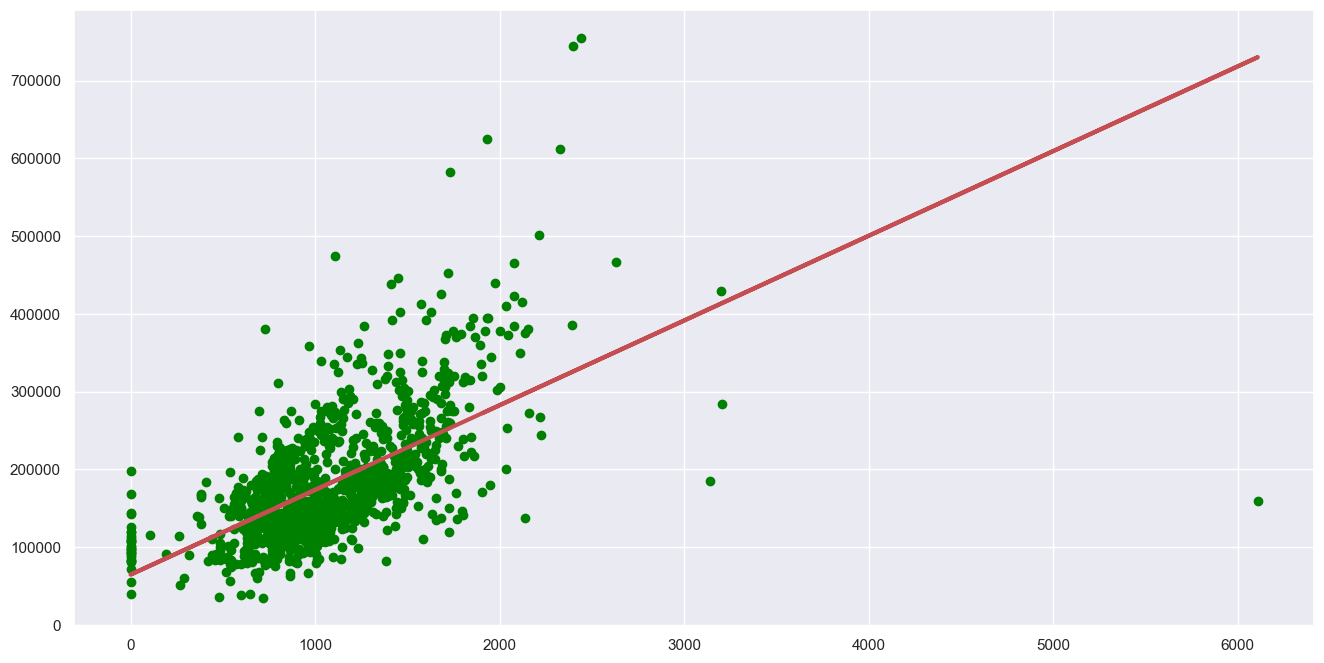

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

TotalBsmtSF = pd.DataFrame(train_df['TotalBsmtSF'])
SalePrice = pd.DataFrame(train_df['SalePrice'])
X_train,X_test,Y_train,Y_test = train_test_split(TotalBsmtSF,SalePrice,test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train,Y_train)

print('Intercept of Regression \t: b = ',linreg.intercept_)
print('Coefficients of Regression \t: a = ',linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,y_train_pred,'r-',linewidth=3)
plt.show()

In [25]:
# Goodness of Fit of Model - Train Data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, y_train_pred))
print()

# Goodness of Fit of Model - Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37137346520668746
Mean Squared Error (MSE) 	: 3972456927.137884

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.39442236019069
Mean Squared Error (MSE) 	: 3782595521.1086445



## GarageArea

Intercept of Regression 	: b =  [66617.8767237]
Coefficients of Regression 	: a =  [[107.93141436]]



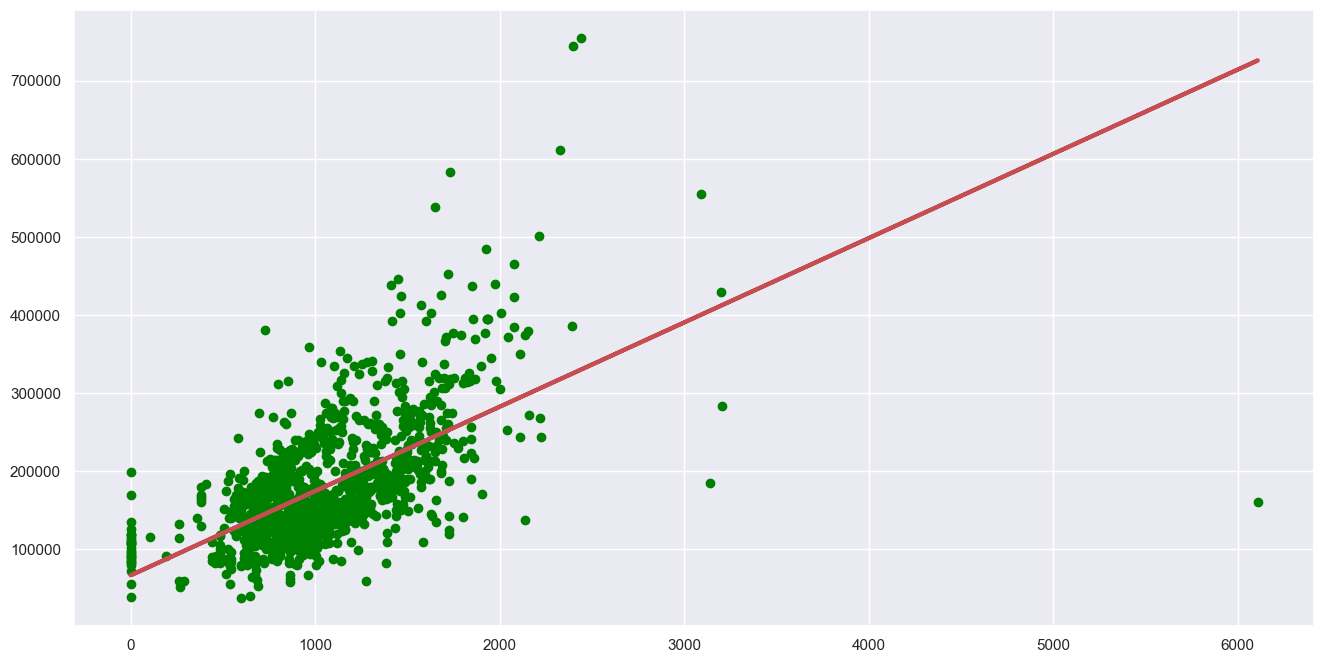

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

GarageArea = pd.DataFrame(train_df['GarageArea'])
SalePrice = pd.DataFrame(train_df['SalePrice'])
X_train,X_test,Y_train,Y_test = train_test_split(TotalBsmtSF,SalePrice,test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train,Y_train)

print('Intercept of Regression \t: b = ',linreg.intercept_)
print('Coefficients of Regression \t: a = ',linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,y_train_pred,'r-',linewidth=3)
plt.show()

In [27]:
# Goodness of Fit of Model - Train Data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, y_train_pred))
print()

# Goodness of Fit of Model - Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3689304307058454
Mean Squared Error (MSE) 	: 3905301229.4067273

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4023386019779317
Mean Squared Error (MSE) 	: 4050668693.827823



### The best model among these three is the Linear Regression model to predict SalePrice using GrLivArea. 

`GrLivArea` because we can see in the regression line plot in number 1, the metric shows the best value, which in the Test Dataset has the lowest MSE = 3378146332.8504815. Meanwhile, we can see in number 2, TotalBsmtSF has higher MSE = 3782595521.1086445 and GarageArea has the highest MSE = 4050668693.827823.

Since the difference between those MSE values between the three GrLivArea, TotalBsmtSF, and GarageArea is high in between. Thus, we can assume it as the average fit model of each scenario and analyse the metric given. Thus, I came to the conclusion that GrLivArea gives the best fit model for predicting the SalePrice.

# Number 3

## Part A: Clean the Dataset

In [62]:
GrLivArea

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1455,1647
1456,2073
1457,2340
1458,1078


In [63]:
SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [64]:
jointDF

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [65]:
# Outliers based on GrLivArea
Q1_gr = jointDF['GrLivArea'].quantile(0.25)
Q3_gr = jointDF['GrLivArea'].quantile(0.75)
IQR_gr = Q3_gr-Q1_gr
lw_gr = Q1_gr - 1.5 * IQR_gr
rw_gr = Q3_gr + 1.5 * IQR_gr

# Outliers based on SalePrice
Q1_sp = jointDF['SalePrice'].quantile(0.25)
Q3_sp = jointDF['SalePrice'].quantile(0.75)
IQR_sp = Q3_sp - Q1_sp
lw_sp = Q1_sp - 1.5 * IQR_sp
rw_sp = Q3_sp + 1.5 * IQR_sp

outliers = jointDF[(jointDF['GrLivArea'] < lw_gr) | (jointDF['GrLivArea'] > rw_gr)]
jointDF = jointDF.drop(outliers.index)

threshold = 1.5
outliers = jointDF[(jointDF['SalePrice'] < lw_sp) | (jointDF['SalePrice'] > rw_sp)]
jointDF = jointDF.drop(outliers.index)

jointDF

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


## Part B

Response Variable : **SalePrice**     
Predictor Feature : **GrLivArea**       

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

Intercept of Regression 	: b =  [47095.09395291]
Coefficients of Regression 	: a =  [[81.9657684]]



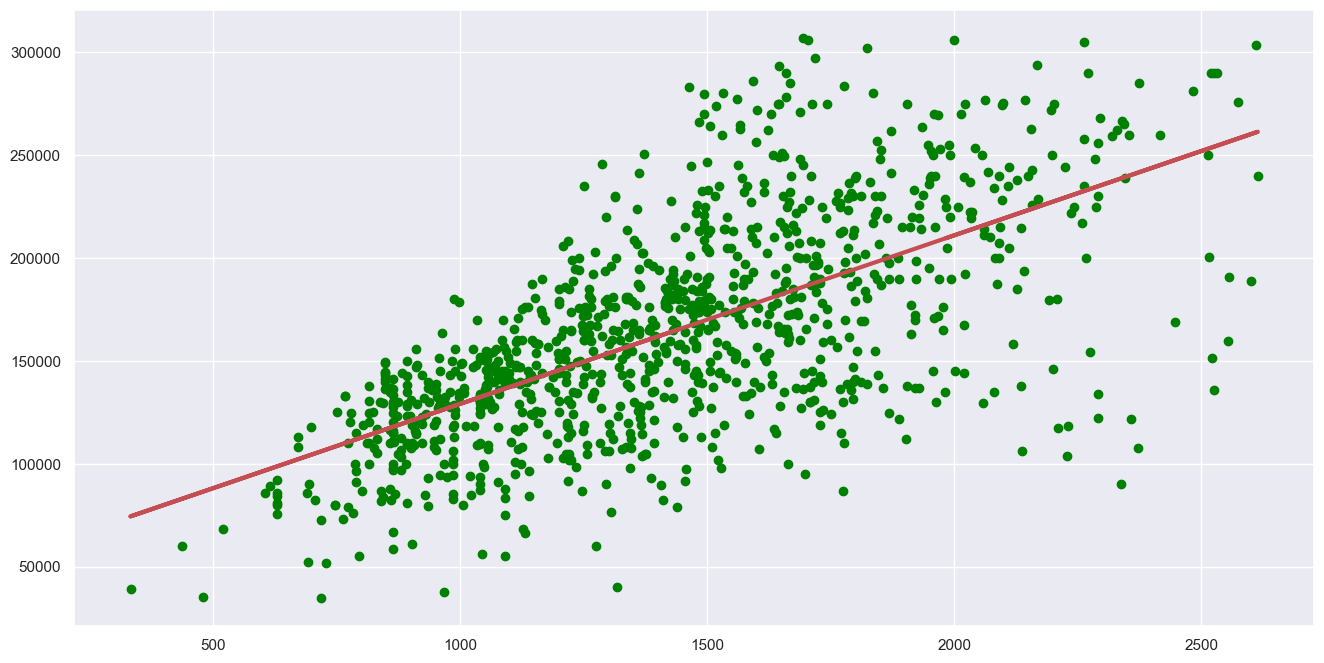

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.42778513965380116
Mean Squared Error (MSE) 	: 1539310387.6127608

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4825984191500732
Mean Squared Error (MSE) 	: 1506565435.0696971



In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

GrLivArea = pd.DataFrame(jointDF['GrLivArea'])
SalePrice = pd.DataFrame(jointDF['SalePrice'])
X_train,X_test,Y_train,Y_test = train_test_split(GrLivArea,SalePrice,test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train,Y_train)

print('Intercept of Regression \t: b = ',linreg.intercept_)
print('Coefficients of Regression \t: a = ',linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,y_train_pred,'r-',linewidth=3)
plt.show()

The model coefficients are `a = 81.9657684` and  `b = 47095.09395291`for this current fit model in the Regression Model : SalePrice =  𝑎
   ×
  GrLivArea +  𝑏

## Part C

In [34]:
# Goodness of Fit of Model - Train Data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, y_train_pred))
print()

# Goodness of Fit of Model - Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.42778513965380116
Mean Squared Error (MSE) 	: 1539310387.6127608

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4825984191500732
Mean Squared Error (MSE) 	: 1506565435.0696971



`Yes`, the new dataset after removing the outlier is obviously better. First of all, the dataset is huge enough so that when we remove the outlier, it will not affect the dataset as a whole.

Next, we can see that before removing the outliers, the value of MSE of Test Dataset = 3378146332.8504815  ;  after removing the outliers, the value of MSE of Test Dataset = 1506565435.0696971. We can see that the value of MSE after removing the outlier dropped by approximately half. This means that the mean error in the clean dataset is much lower and thus the prediction accuracy is better and gives the overview of the trends more accurately.

Looking at the Explained Variance (R^2), the
   uncleaned dataset = 0.45645829117179193
   cleaned dataset = 0.4825984191500732
the cleaned dataset has slightly higher R^2 value, but it is only worse by a small value of approximately 0.03.
Thus, given by huge gap advantage in the MSE value which gives the cleaned dataset much a better model, this small value of R^2 is negligible.


Hence, the new clean dataset is better than the previous one when being used for the prediction.